In [15]:
import pandas as pd
import matplotlib.pyplot as plt

                 AAPL       AMZN      GOOGL        META       MSFT
Date                                                              
2018-01-02  40.615879  59.450500  53.598984  181.047958  79.936737
2018-01-03  40.608822  60.209999  54.513435  184.291290  80.308762
2018-01-04  40.797447  60.479500  54.725189  183.951996  81.015579
2018-01-05  41.261925  61.457001  55.450859  186.466827  82.020035
2018-01-08  41.108669  62.343498  55.646633  187.893890  82.103706


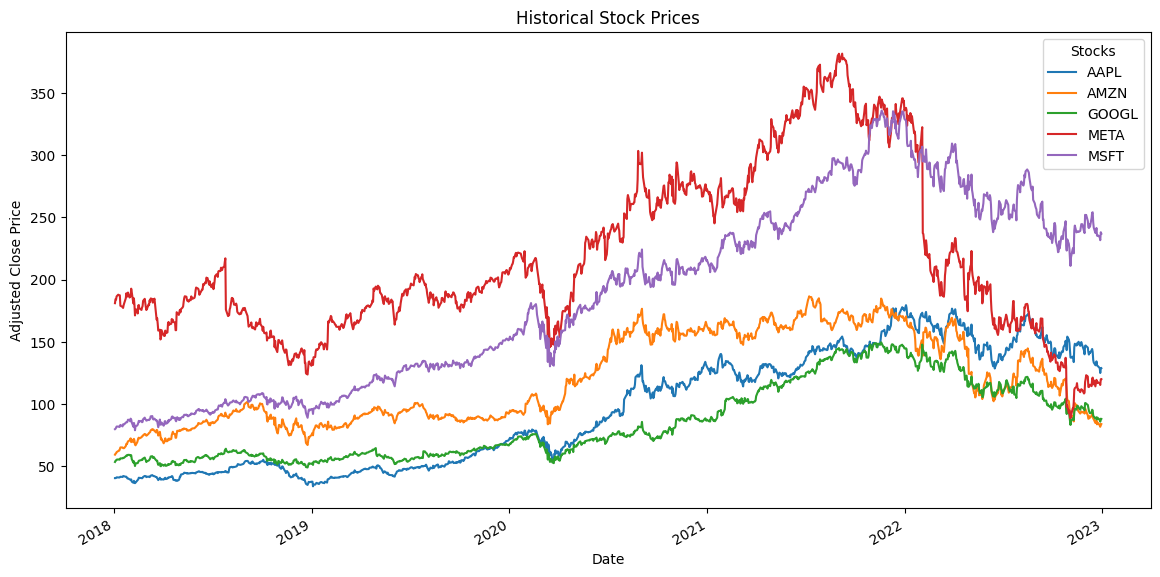

In [16]:
# Load the data
stock_data = pd.read_csv("stock_data.csv", index_col="Date", parse_dates=True)

# Display the first few rows of the data
print(stock_data.head())

# Plot the closing prices of the stocks
stock_data.plot(figsize=(14, 7))
plt.title("Historical Stock Prices")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend(title="Stocks")
plt.show()

In [3]:
# Descriptive statistics
descriptive_stats = stock_data.describe()
print(descriptive_stats)

              AAPL         AMZN        GOOGL         META         MSFT
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000
mean     96.024540   119.812384    85.612441   217.443771   187.776437
std      46.294215    35.592042    30.702328    66.776713    74.598652
min      34.029240    59.450500    49.177063    88.727676    79.062508
25%      49.103733    88.930500    58.671661   170.180290   113.665115
50%      89.489700   107.783501    73.870720   194.071198   194.930206
75%     141.005424   158.086998   112.544582   266.317749   249.983871
max     179.481125   186.570496   149.666733   381.396240   335.709808


In [4]:
# Calculate daily returns
daily_returns = stock_data.pct_change().dropna()

# Display the first few rows of daily returns
print(daily_returns.head())

                AAPL      AMZN     GOOGL      META      MSFT
Date                                                        
2018-01-03 -0.000174  0.012775  0.017061  0.017914  0.004654
2018-01-04  0.004645  0.004476  0.003884 -0.001841  0.008801
2018-01-05  0.011385  0.016163  0.013260  0.013671  0.012398
2018-01-08 -0.003714  0.014425  0.003531  0.007653  0.001020
2018-01-09 -0.000115  0.004676 -0.001274 -0.002178 -0.000680


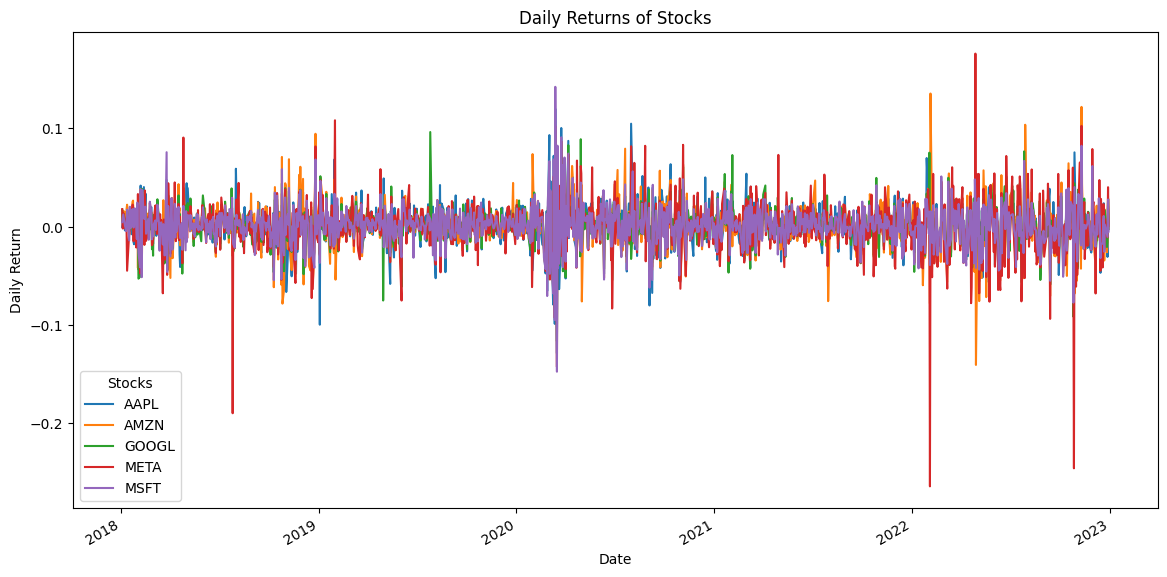

In [5]:
# Plot daily returns
daily_returns.plot(figsize=(14, 7))
plt.title("Daily Returns of Stocks")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend(title="Stocks")
plt.show()

           AAPL      AMZN     GOOGL      META      MSFT
AAPL   1.000000  0.652026  0.700822  0.584575  0.772959
AMZN   0.652026  1.000000  0.682788  0.610645  0.715261
GOOGL  0.700822  0.682788  1.000000  0.675031  0.808735
META   0.584575  0.610645  0.675031  1.000000  0.622377
MSFT   0.772959  0.715261  0.808735  0.622377  1.000000


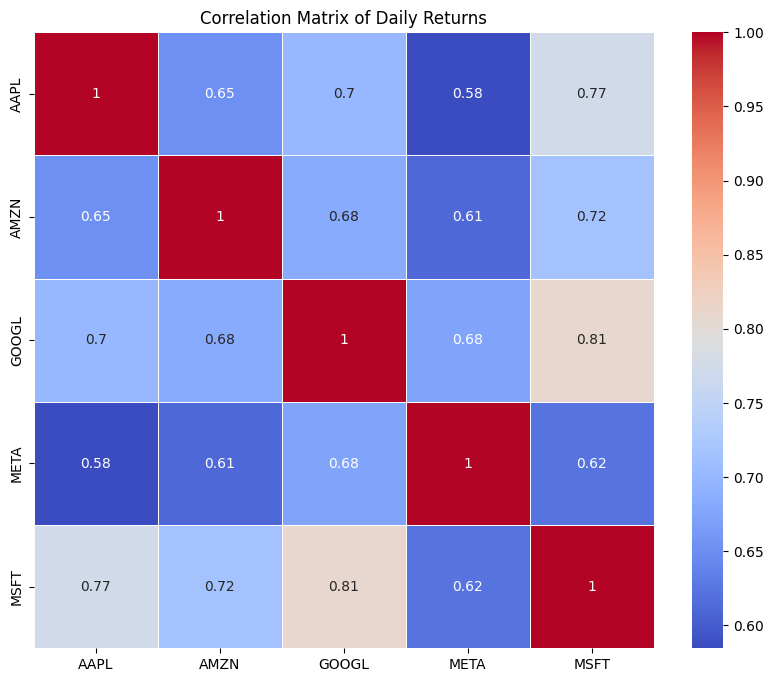

In [6]:
# Calculate correlation matrix
correlation_matrix = daily_returns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Daily Returns")
plt.show()

In [7]:
# Calculate annualized average return and volatility
annualized_return = daily_returns.mean() * 252
annualized_volatility = daily_returns.std() * (252 ** 0.5)

# Calculate Sharpe ratio (assuming risk-free rate is 0)
sharpe_ratio = annualized_return / annualized_volatility

# Create a DataFrame for these metrics
risk_return_metrics = pd.DataFrame({
    "Annualized Return": annualized_return,
    "Annualized Volatility": annualized_volatility,
    "Sharpe Ratio": sharpe_ratio
})

# Display the risk and return metrics
print(risk_return_metrics)

       Annualized Return  Annualized Volatility  Sharpe Ratio
AAPL            0.287461               0.334850      0.858477
AMZN            0.133328               0.358028      0.372396
GOOGL           0.148950               0.313965      0.474416
META            0.014218               0.432307      0.032888
MSFT            0.265836               0.310333      0.856615


In [8]:
import numpy as np

# Function to calculate VaR and ES
def calculate_var_es(returns, confidence_level=0.05):
    var = returns.quantile(confidence_level)
    es = returns[returns <= var].mean()
    return var, es

# Calculate VaR and ES for each stock
var_es = daily_returns.apply(calculate_var_es, confidence_level=0.01).T
var_es.columns = ['VaR (1%)', 'ES (1%)']

# Display VaR and ES
print(var_es)

       VaR (1%)   ES (1%)
AAPL  -0.055846 -0.075221
AMZN  -0.059263 -0.076749
GOOGL -0.052250 -0.067221
META  -0.067789 -0.119720
MSFT  -0.050120 -0.068641


In [9]:
# Combine all metrics into one DataFrame
all_metrics = pd.concat([risk_return_metrics, var_es], axis=1)

# Display all metrics
print(all_metrics)

       Annualized Return  Annualized Volatility  Sharpe Ratio  VaR (1%)  \
AAPL            0.287461               0.334850      0.858477 -0.055846   
AMZN            0.133328               0.358028      0.372396 -0.059263   
GOOGL           0.148950               0.313965      0.474416 -0.052250   
META            0.014218               0.432307      0.032888 -0.067789   
MSFT            0.265836               0.310333      0.856615 -0.050120   

        ES (1%)  
AAPL  -0.075221  
AMZN  -0.076749  
GOOGL -0.067221  
META  -0.119720  
MSFT  -0.068641  


In [10]:
# Function to calculate portfolio return and volatility
def portfolio_performance(weights, returns):
    portfolio_return = np.sum(weights * returns.mean()) * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))
    return portfolio_return, portfolio_volatility

In [11]:
# Number of portfolios to generate
num_portfolios = 10000

# Initialize arrays to store portfolio returns, volatilities, and weights
results = np.zeros((3, num_portfolios))
weights_record = []

# Generate random portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(stock_data.columns))
    weights /= np.sum(weights)  # Normalize weights
    weights_record.append(weights)
    portfolio_return, portfolio_volatility = portfolio_performance(weights, daily_returns)
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = results[0, i] / results[1, i]  # Sharpe ratio

# Convert results to a DataFrame
results_df = pd.DataFrame(results.T, columns=['Return', 'Volatility', 'Sharpe Ratio'])


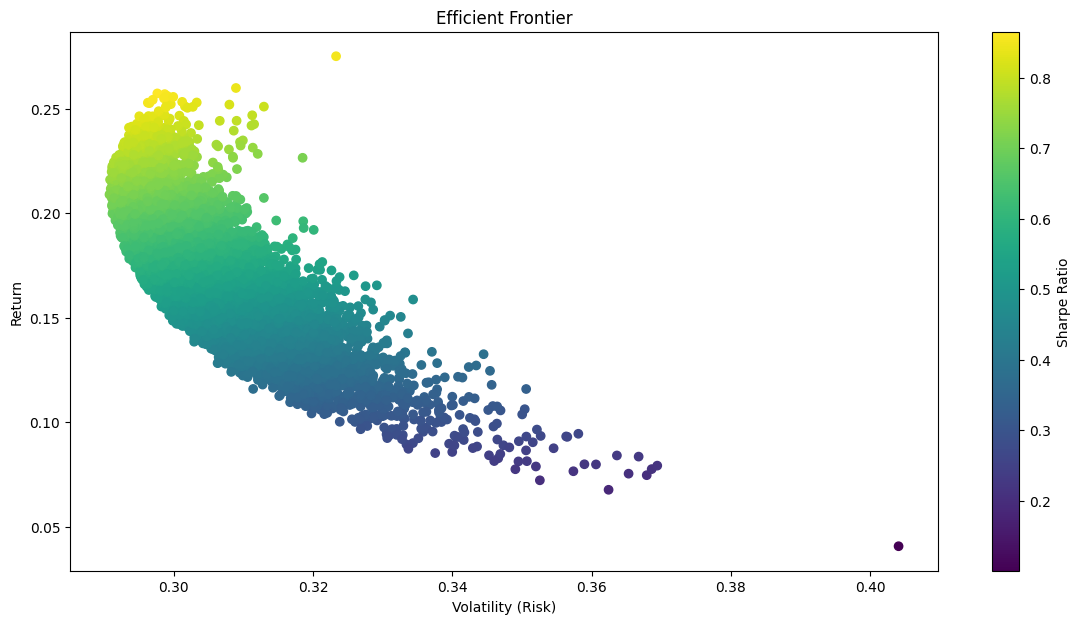

In [12]:
# Plot Efficient Frontier
plt.figure(figsize=(14, 7))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.show()


In [24]:
# Identify the portfolio with the maximum Sharpe ratio
max_sharpe_idx = results_df['Sharpe Ratio'].idxmax()
max_sharpe_portfolio = results_df.loc[max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx]

# Identify the portfolio with the minimum volatility
min_volatility_idx = results_df['Volatility'].idxmin()
min_volatility_portfolio = results_df.loc[min_volatility_idx]
min_volatility_weights = weights_record[min_volatility_idx]

print("Portfolio with Maximum Sharpe Ratio:")
print(max_sharpe_portfolio)

print("Weights:")
print(pd.Series(max_sharpe_weights, index=stock_data.columns))



Portfolio with Maximum Sharpe Ratio:
Return          0.264293
Volatility      0.299826
Sharpe Ratio    0.881489
Name: 1525, dtype: float64
Weights:
AAPL     0.296062
AMZN     0.000229
GOOGL    0.034688
META     0.015342
MSFT     0.653680
dtype: float64


In [23]:
print("\nPortfolio with Minimum Volatility:")
print(min_volatility_portfolio)

print("Weights:")
print(pd.Series(min_volatility_weights, index=stock_data.columns))



Portfolio with Minimum Volatility:
Return          0.214672
Volatility      0.290746
Sharpe Ratio    0.738349
Name: 8916, dtype: float64
Weights:
AAPL     0.208770
AMZN     0.102147
GOOGL    0.360331
META     0.000104
MSFT     0.328649
dtype: float64


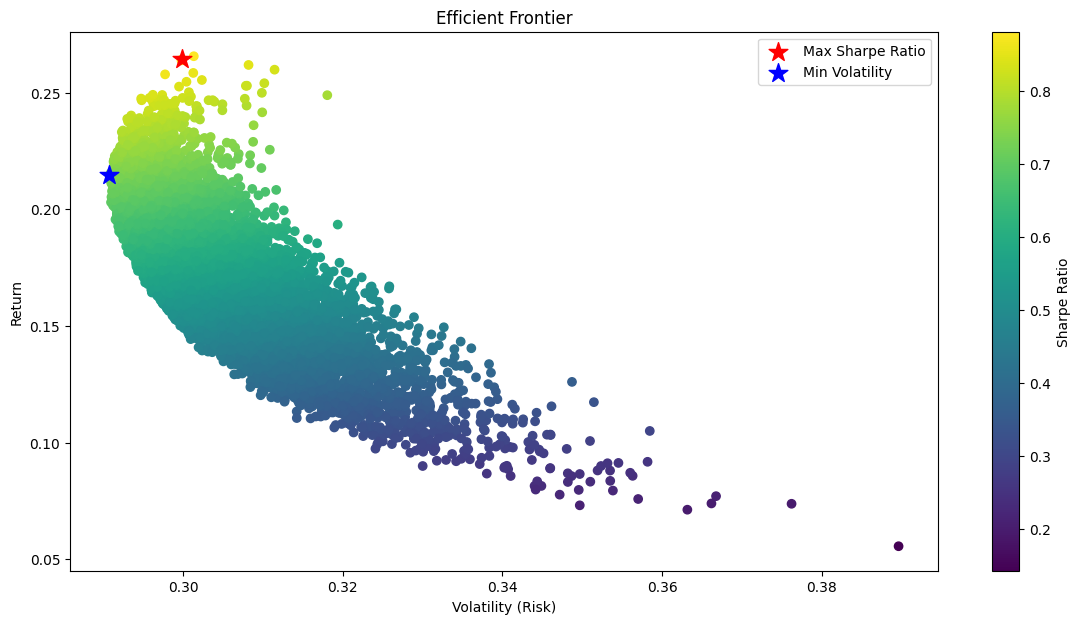

In [17]:
# Plot Efficient Frontier with optimal portfolios highlighted
plt.figure(figsize=(14, 7))
plt.scatter(results_df['Volatility'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return'], c='red', marker='*', s=200, label='Max Sharpe Ratio')
plt.scatter(min_volatility_portfolio['Volatility'], min_volatility_portfolio['Return'], c='blue', marker='*', s=200, label='Min Volatility')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.show()


# Backtesting

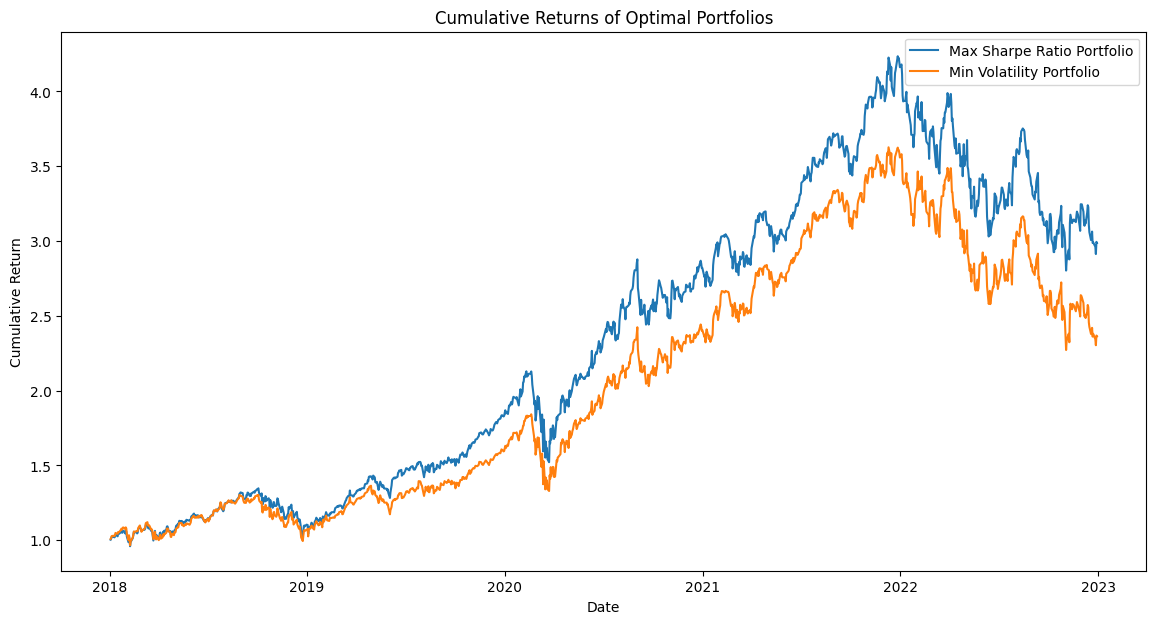

In [26]:
# Calculate historical returns for the optimal portfolios
def calculate_portfolio_returns(weights, returns):
    portfolio_returns = returns.dot(weights)
    return portfolio_returns

# Historical returns for Max Sharpe Ratio Portfolio
max_sharpe_returns = calculate_portfolio_returns(max_sharpe_weights, daily_returns)

# Historical returns for Min Volatility Portfolio
min_volatility_returns = calculate_portfolio_returns(min_volatility_weights, daily_returns)

# Calculate cumulative returns
cumulative_max_sharpe_returns = (1 + max_sharpe_returns).cumprod()
cumulative_min_volatility_returns = (1 + min_volatility_returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(cumulative_max_sharpe_returns, label='Max Sharpe Ratio Portfolio')
plt.plot(cumulative_min_volatility_returns, label='Min Volatility Portfolio')
plt.title('Cumulative Returns of Optimal Portfolios')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.show()


In [27]:
# Function to calculate performance metrics
def calculate_performance_metrics(portfolio_returns):
    annualized_return = portfolio_returns.mean() * 252
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_volatility
    return annualized_return, annualized_volatility, sharpe_ratio

# Performance metrics for Max Sharpe Ratio Portfolio
max_sharpe_performance = calculate_performance_metrics(max_sharpe_returns)

# Performance metrics for Min Volatility Portfolio
min_volatility_performance = calculate_performance_metrics(min_volatility_returns)

# Display performance metrics
performance_metrics = pd.DataFrame({
    'Max Sharpe Ratio Portfolio': max_sharpe_performance,
    'Min Volatility Portfolio': min_volatility_performance
}, index=['Annualized Return', 'Annualized Volatility', 'Sharpe Ratio'])

print("Performance Metrics of Optimal Portfolios:")
print(performance_metrics)


Performance Metrics of Optimal Portfolios:
                       Max Sharpe Ratio Portfolio  Min Volatility Portfolio
Annualized Return                        0.264293                  0.214672
Annualized Volatility                    0.299826                  0.290746
Sharpe Ratio                             0.881489                  0.738349


In [29]:
import yfinance as yf

# Calculate downside risk for Sortino Ratio
def calculate_downside_risk(returns, target_return=0):
    downside_returns = returns[returns < target_return]
    downside_risk = np.sqrt(np.mean(downside_returns ** 2)) * np.sqrt(252)
    return downside_risk

# Function to calculate performance metrics including Sortino and Treynor Ratios
def calculate_extended_performance_metrics(portfolio_returns, market_returns, risk_free_rate=0):
    annualized_return = portfolio_returns.mean() * 252
    annualized_volatility = portfolio_returns.std() * np.sqrt(252)
    sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
    
    downside_risk = calculate_downside_risk(portfolio_returns)
    sortino_ratio = (annualized_return - risk_free_rate) / downside_risk
    
    beta = np.cov(portfolio_returns, market_returns)[0, 1] / np.var(market_returns)
    treynor_ratio = (annualized_return - risk_free_rate) / beta
    
    return annualized_return, annualized_volatility, sharpe_ratio, sortino_ratio, treynor_ratio

# Assume risk-free rate
risk_free_rate = 0.01  # 1% annual risk-free rate

# Assume market returns (e.g., S&P 500)
market_data = yf.download('^GSPC', start='2018-01-01', end='2023-01-01')['Adj Close'].pct_change().dropna()
market_returns = market_data

# Extended performance metrics for Max Sharpe Ratio Portfolio
max_sharpe_extended_performance = calculate_extended_performance_metrics(max_sharpe_returns, market_returns, risk_free_rate)

# Extended performance metrics for Min Volatility Portfolio
min_volatility_extended_performance = calculate_extended_performance_metrics(min_volatility_returns, market_returns, risk_free_rate)

# Display extended performance metrics
extended_performance_metrics = pd.DataFrame({
    'Max Sharpe Ratio Portfolio': max_sharpe_extended_performance,
    'Min Volatility Portfolio': min_volatility_extended_performance
}, index=['Annualized Return', 'Annualized Volatility', 'Sharpe Ratio', 'Sortino Ratio', 'Treynor Ratio'])

print("Extended Performance Metrics of Optimal Portfolios:")
print(extended_performance_metrics)


[*********************100%%**********************]  1 of 1 completed

Extended Performance Metrics of Optimal Portfolios:
                       Max Sharpe Ratio Portfolio  Min Volatility Portfolio
Annualized Return                        0.264293                  0.214672
Annualized Volatility                    0.299826                  0.290746
Sharpe Ratio                             0.848136                  0.703954
Sortino Ratio                            0.825706                  0.667315
Treynor Ratio                            0.208904                  0.173276
